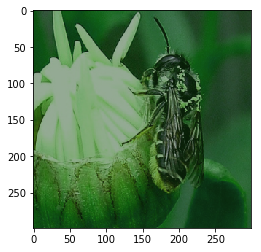

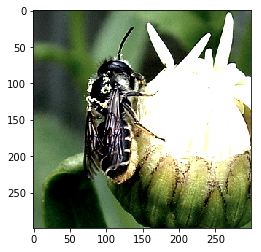

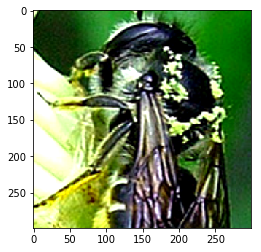

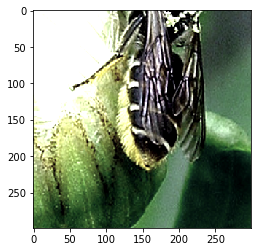

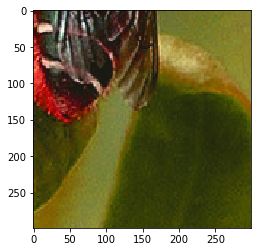

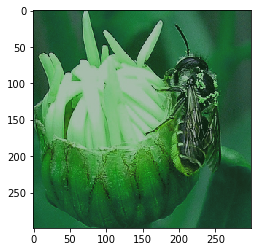

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

def distort_color(image, color_ordering=0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    elif color_ordering == 1:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
    elif color_ordering == 2:
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        
    return tf.clip_by_value(image, 0.0, 1.0)

def preprocess_for_train(image, height, width, bbox):
    if bbox is None:
        bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(tf.shape(image), bounding_boxes=bbox)
    
    distorted_image = tf.slice(image, bbox_begin, bbox_size)
    distorted_image = tf.image.resize_images(distorted_image, [height, width], method=np.random.randint(4))
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    
    return distorted_image

image_raw_data = tf.gfile.FastGFile(os.path.join('data', 'flower_photos', 'daisy', '173350276_02817aa8d5.jpg'),
                                   'rb').read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    boxes = tf.constant([[[0.06, 0.5, 0.8, 0.85], [0.1, 0.6, 0.3, 0.8]]])
    
    for i in range(6):
        result = preprocess_for_train(img_data, 299, 299, boxes)
        plt.imshow(result.eval())
        plt.show()